# diabetes prediction using RandomForestClassifier

# problem statement
The objective is to predict based on diagnostic measurements whether a patient has diabetes.

# dataset
I got the dataset from kaggle which has the following columns: 

*Pregnancies: Number of times pregnant

*Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

*BloodPressure: Diastolic blood pressure (mm Hg)

*SkinThickness: Triceps skin fold thickness (mm)

*Insulin: 2-Hour serum insulin (mu U/ml)

*BMI: Body mass index (weight in kg/(height in m)^2)

*DiabetesPedigreeFunction: Diabetes pedigree function

*Age: Age (years)

*Outcome: Class variable (0 or 1)





# target variable explanation
the target variable outcome consist of 0 and 1 where 0 represents that one has no diabetes(tested negative) while 1 shows one has diabetes(tested positive) 

# Tools preparation
pandas and numpy for data analysis and exploration

seaborn and matplotlib fot data visualization

RandomForestClassifier  for building a model

accuracy score for metrics purposes

# loading libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# loading data

In [2]:
datas=pd.read_csv("diabetes.csv")
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
datas.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# checking total number of rows and columns

In [4]:
datas.shape

(768, 9)

# checking for duplicates

In [5]:
datas.duplicated().sum()

0

# checking for null values

In [7]:
datas.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# data analysis 

In [8]:
datas.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# how to handle warnings

In [21]:
#how to handle warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# data visualization using seaborn,matplotlib,pandas

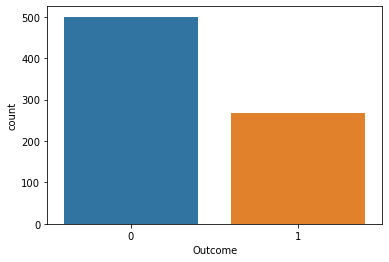

In [22]:
#drawing count plot for the target variable
sns.countplot('Outcome',data=datas);

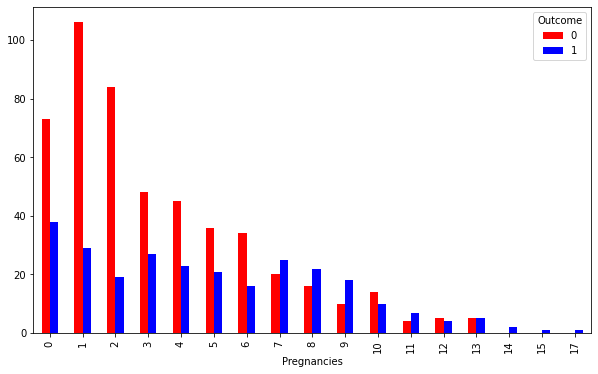

In [11]:
#creating a plot
pd.crosstab(datas.Pregnancies,datas.Outcome).plot(kind="bar",figsize=(10,6),color=['red','blue']);

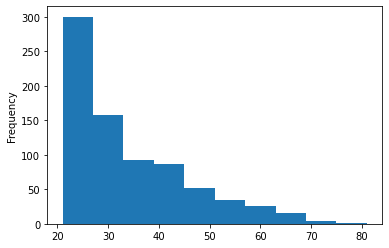

In [12]:
datas.Age.plot.hist();

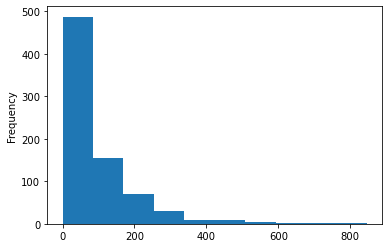

In [13]:
datas.Insulin.plot.hist();

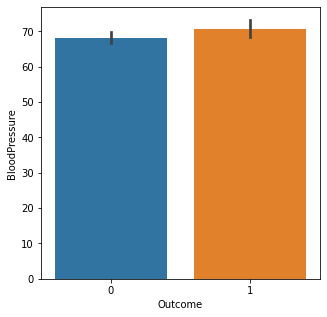

In [14]:
#more analysis for more understanding
#people who have diabetes are likely to have bloodpressure
plot=plt.figure(figsize=(5,5))
sns.barplot(x="Outcome",y="BloodPressure",data=datas);

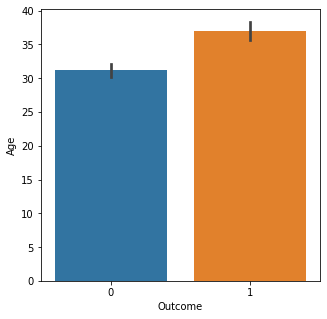

In [15]:
#the aged pepole are more affaected by diabetes
plot=plt.figure(figsize=(5,5))
sns.barplot(x="Outcome",y="Age",data=datas);

In [118]:
datas['Insulin'].value_counts().sum()

768

# correlation

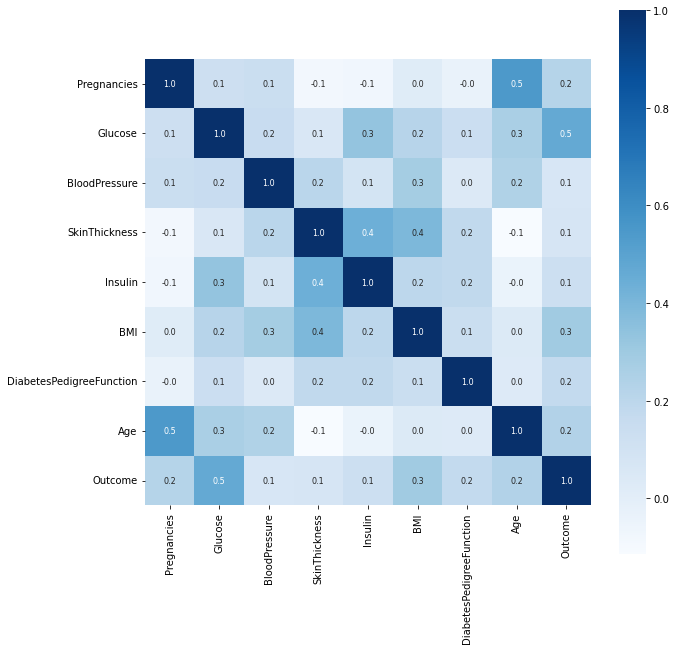

In [17]:
correlation=datas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues');

# checking how many other missing (zero) values

In [18]:
print("total number of rows:{0}".format(len(datas)))
print("total number of Pregnancies:{0}".format(len(datas.loc[datas['Pregnancies']==0])))
print("total number of BloodPressure:{0}".format(len(datas.loc[datas['BloodPressure']==0])))
print("total number of Glucose:{0}".format(len(datas.loc[datas['Glucose']==0])))
print("total number of SkinThickness:{0}".format(len(datas.loc[datas['SkinThickness']==0])))
print("total number of Insulin:{0}".format(len(datas.loc[datas['Insulin']==0])))
print("total number of Age:{0}".format(len(datas.loc[datas['Age']==0])))
print("total number of BMI:{0}".format(len(datas.loc[datas['BMI']==0])))
print("total number of DiabetesPedigreeFunction:{0}".format(len(datas.loc[datas['DiabetesPedigreeFunction']==0])))


total number of rows:768
total number of Pregnancies:111
total number of BloodPressure:35
total number of Glucose:5
total number of SkinThickness:227
total number of Insulin:374
total number of Age:0
total number of BMI:11
total number of DiabetesPedigreeFunction:0


# Filling the missing values of zero with the mean

In [33]:
from sklearn.impute import SimpleImputer
fill_values= SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)


# splitting tha dataset

In [25]:
x=datas[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=datas[['Outcome']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(x_train.shape,y_train.shape,y_test.shape)

(614, 8) (614, 1) (154, 1)


# model training: using RandomForestClassifier

In [27]:
cl= RandomForestClassifier()

In [28]:
cl.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
pred=cl.predict(x_test)
test=accuracy_score(pred,y_test)
print(test)

0.7662337662337663


# hyperparameter tunning

# Building a RandomForest model with hyperparameters

In [103]:
#number of trees in random forest
n_estimators=[10,20,30]
max_depth=[3,4,5]

# create a param_grid

In [105]:
param_grid={'n_estimators':n_estimators,
           "max_depth":max_depth
             }
print(param_grid)

{'n_estimators': [10, 20, 30], 'max_depth': [3, 4, 5]}


# using Gridsearchcv

In [144]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=cl,param_grid=param_grid,cv=10,verbose=2,n_jobs=4)

In [147]:
rf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [10, 20, 30]},
             verbose=2)

In [148]:
rf_grid.best_params_

{'max_depth': 4, 'n_estimators': 20}

In [149]:
cl.fit(x_train,y_train)

RandomForestClassifier()

# check for the accuracy

In [151]:
print(f'train accuracy-:{rf_grid.score(x_train,y_train):3f}')
print(f'test accuracy-:{rf_grid.score(x_test,y_test):3f}')

train accuracy-:0.825733
test accuracy-:0.798701


# building a predictive model

In [152]:
input_data=(2,197,70,45,543,30.5,0.158,53)
#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=cl.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("one has diabetes")
else:
    print("does not have diabetes")

[1]
one has diabetes
